In [3]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, mean_absolute_error, mean_squared_error,
                             classification_report)

import numpy as np
import seaborn as sns

digits = load_digits(as_frame=True)

In [4]:
X_train, x_test, Y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.33, random_state=42)

## Regresión Lineal

In [5]:
model = LogisticRegression(max_iter=10000)

model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [6]:
X_train.shape, x_test.shape, Y_train.shape, y_test.shape

((1203, 64), (594, 64), (1203,), (594,))

In [7]:
y_pred = model.predict(x_test)

In [8]:
print(confusion_matrix(y_test, y_pred))

[[55  0  0  0  0  0  0  0  0  0]
 [ 0 52  1  0  0  0  0  0  2  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  1 54  0  1  0  0  0  0]
 [ 0  1  0  0 63  0  0  0  0  0]
 [ 0  1  0  0  0 70  1  0  0  1]
 [ 0  0  0  0  0  1 56  0  0  0]
 [ 0  0  0  0  0  1  0 61  0  0]
 [ 0  1  0  0  0  1  0  0 50  0]
 [ 0  0  0  1  0  0  0  0  2 65]]


<Axes: >

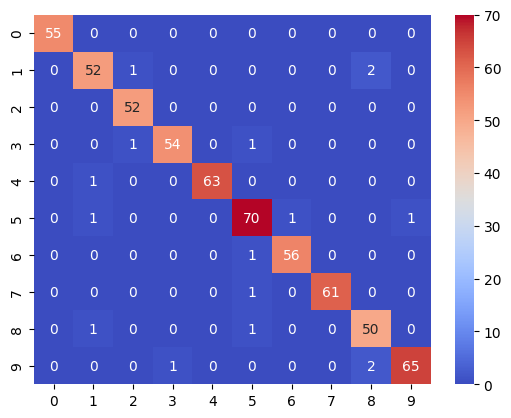

In [9]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="coolwarm")

In [10]:
print("Classification report: \n", classification_report(y_test, y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.95      0.95      0.95        55
           2       0.96      1.00      0.98        52
           3       0.98      0.96      0.97        56
           4       1.00      0.98      0.99        64
           5       0.95      0.96      0.95        73
           6       0.98      0.98      0.98        57
           7       1.00      0.98      0.99        62
           8       0.93      0.96      0.94        52
           9       0.98      0.96      0.97        68

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594



- Puede que tenga una precisión alta debido a que el dataset tiene un valor lineal. 
- Al ser con poca resolución, hay menos variabilidad ya que partimos de menos pixeles de información, lo que ayuda a diferenciar mejor
- Las reglas de aprendizaje son sencillas

## Perceptro

In [20]:
from sklearn.linear_model import Perceptron

In [21]:
model_perceptron = Perceptron(random_state=42)

In [24]:
perc_yPred = model_perceptron.predict(x_test)

<Axes: >

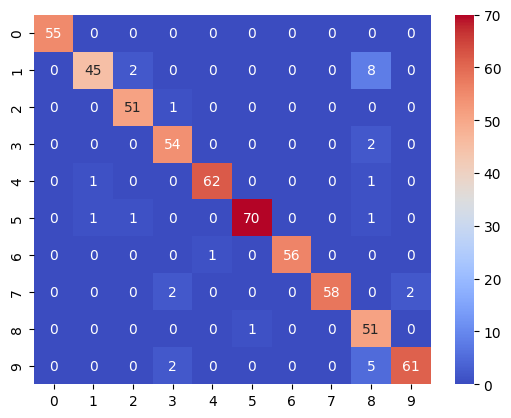

In [34]:
sns.heatmap(confusion_matrix(y_test, perc_yPred), annot=True, cmap="coolwarm", xticklabels=True, yticklabels=True)

El eje X es y_pred y el eje Y es y_test

In [26]:
print("Classification report: \n", classification_report(y_test, perc_yPred))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.96      0.82      0.88        55
           2       0.94      0.98      0.96        52
           3       0.92      0.96      0.94        56
           4       0.98      0.97      0.98        64
           5       0.99      0.96      0.97        73
           6       1.00      0.98      0.99        57
           7       1.00      0.94      0.97        62
           8       0.75      0.98      0.85        52
           9       0.97      0.90      0.93        68

    accuracy                           0.95       594
   macro avg       0.95      0.95      0.95       594
weighted avg       0.95      0.95      0.95       594



## Arbol de decisión

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
model_decisionTree = DecisionTreeClassifier(random_state=42)

In [23]:
model_decisionTree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
decisionTree_ypred = model_decisionTree.predict(x_test)

In [25]:
print(confusion_matrix(y_test, decisionTree_ypred)) 

[[52  0  0  0  1  1  1  0  0  0]
 [ 0 36  6  2  7  0  2  0  0  2]
 [ 0  2 42  2  0  0  2  1  3  0]
 [ 0  1  2 46  1  1  0  0  3  2]
 [ 1  2  0  1 54  0  3  2  1  0]
 [ 0  0  1  0  4 61  0  0  0  7]
 [ 0  0  1  0  1  0 55  0  0  0]
 [ 0  0  1  2  2  0  0 54  0  3]
 [ 1  3  2  2  1  0  0  0 40  3]
 [ 0  1  0  1  1  3  1  3  3 55]]


<Axes: >

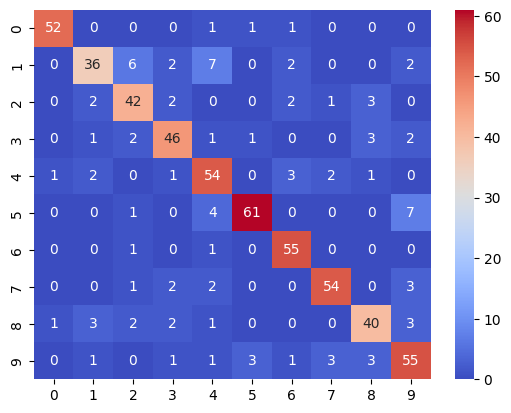

In [34]:
sns.heatmap(confusion_matrix(y_test, decisionTree_ypred), annot=True, cmap="coolwarm")

In [26]:
print("Classification report: \n", classification_report(y_test, decisionTree_ypred))

Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        55
           1       0.80      0.65      0.72        55
           2       0.76      0.81      0.79        52
           3       0.82      0.82      0.82        56
           4       0.75      0.84      0.79        64
           5       0.92      0.84      0.88        73
           6       0.86      0.96      0.91        57
           7       0.90      0.87      0.89        62
           8       0.80      0.77      0.78        52
           9       0.76      0.81      0.79        68

    accuracy                           0.83       594
   macro avg       0.83      0.83      0.83       594
weighted avg       0.84      0.83      0.83       594



Puede que el valor de precisión sea mas bajo que las demas porque el arbol de decisión es mas difícil de interpretar relaciones complejas

## Bosque aleatorio

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
model_randomForest = RandomForestClassifier(random_state = 42)

In [29]:
model_randomForest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [30]:
randomForest_ypred = model_randomForest.predict(x_test)

In [31]:
print(confusion_matrix(y_test, randomForest_ypred)) 

[[54  0  0  0  1  0  0  0  0  0]
 [ 0 54  1  0  0  0  0  0  0  0]
 [ 0  0 51  0  0  0  0  0  1  0]
 [ 0  0  0 53  0  1  0  0  2  0]
 [ 0  0  0  0 64  0  0  0  0  0]
 [ 0  0  0  0  1 71  1  0  0  0]
 [ 0  0  0  0  0  1 56  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  1]
 [ 0  3  0  0  0  0  0  0 49  0]
 [ 0  0  0  0  0  0  0  1  1 66]]


In [32]:
print("Classification report: \n", classification_report(y_test, randomForest_ypred))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.95      0.98      0.96        55
           2       0.98      0.98      0.98        52
           3       1.00      0.95      0.97        56
           4       0.97      1.00      0.98        64
           5       0.97      0.97      0.97        73
           6       0.98      0.98      0.98        57
           7       0.98      0.98      0.98        62
           8       0.92      0.94      0.93        52
           9       0.99      0.97      0.98        68

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.98      0.97      0.97       594

